### Importing the required libraries
* Numpy is used for creating and manipulating arrays of data.
* Matplotlib.pyplot includes functions used for creating and analyzing different types of graphs.
* %matplotlib inline calls a 'magic function' that basically tells python to include and display the figures of the created graphs in the notebook itself.

In [3]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dset1 = open("datasets/dataset1.txt", "r")

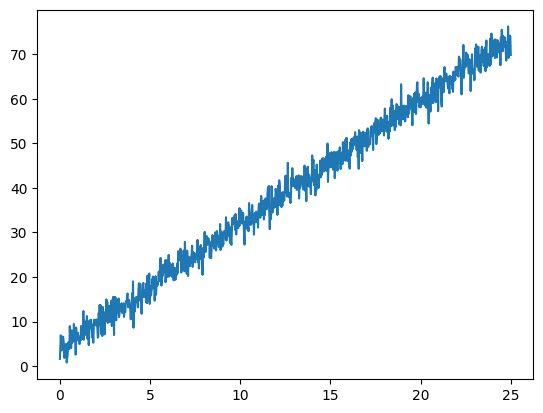

In [5]:
x = []
y = []
for line in dset1:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
x = np.array(x)
y = np.array(y)
plt.plot(x,y)

First, we have opened the text file for reading and created x and y matrices corresponding to the points given in the file. Then we use plt.plot to create a graph with the given points. As can be seen above, we can conclude just by looking that the graph approximately corresponds to a **straight line having some noise**. Thus, we can apply a linear matrix solver to find the equation parameters.

In [6]:
# Use column_stack to put the vectors side by side
M = np.column_stack([x, np.ones(len(x))])

# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"Slope = {p1}\nY - intercept = {p2}\nThus the estimated equation is {p1}*x + {p2}")

Slope = 2.791124245414918
Y - intercept = 3.848800101430742
Thus the estimated equation is 2.791124245414918*x + 3.848800101430742


Since we have assumed a linear solution, there is no need for something complex like curve_fit. We can apply least squares regression with the help of the np.linalg.lstsq function. It finds the parameters of the linear expression such that the mean square error i.e the mean of the squares of errors is minimized.

In [7]:
# absolute errors
err_y = abs(y - p1*x-p2)

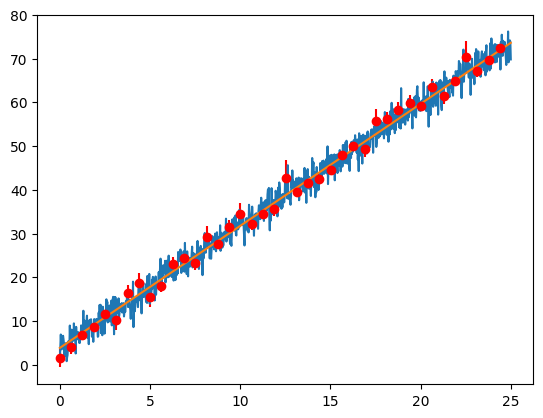

In [8]:
# absolute errors
err_y = abs(y - p1*x-p2)
plt.errorbar(x[::25], y[::25],err_y[::25], fmt='ro')

# plotting line with the found parameters
def stline(x, m, c):
    return m * x + c
yest = stline(x, p1, p2)
plt.plot(x,y,x,yest)

We have plotted the obtained straight line along with the given data. Visually it looks like a good fit, but to better evaluate the quality of the fitting we will plot error bars. Their size will be taken as the absolute difference between the actual and approximated values. Every 25 points we have plotted the error in our fit. Since the error has no large deviations, we can conclude that the fitting is satisfactory.

In [9]:
dset2 = open("datasets/dataset2.txt", "r")

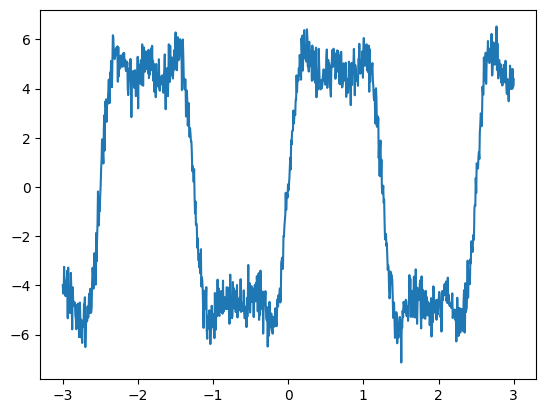

In [10]:
x = []
y = []
for line in dset2:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
x = np.array(x)
y = np.array(y)
plt.plot(x,y)

Again, we read the text file, create x and y matrices corresponding to the points given in the file and plot them. We know that it is a sum of harmonics, and from observation it roughly looks like a __square pulse__ that was created by summing sinusoidal terms. Thus we can say that its fourier series will be composed of a sum of __odd harmonics__. For this type of curve we will be best off using a non-linear fit, i.e curve_fit.

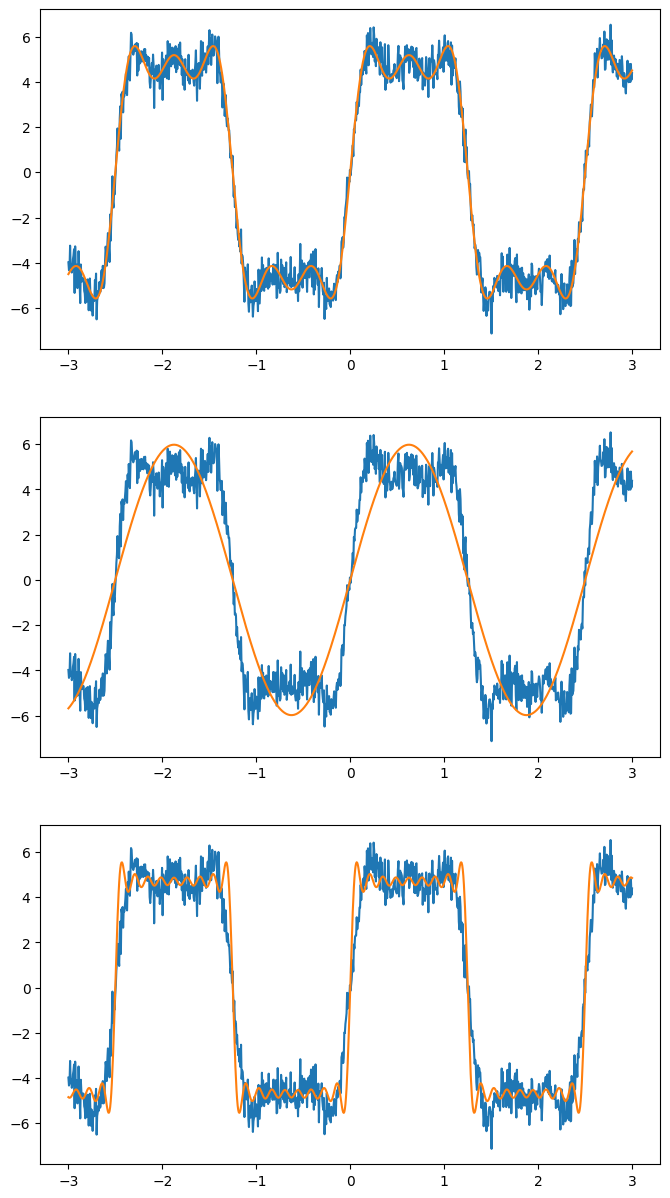

In [32]:
# Set up the non-linear function for curve_fit
def fourier1(t, w, a):
    ans = 0
    # Use 3 harmonics
    for i in range(1,6,2):
        ans += 4*a * np.sin(i*w*np.pi*t)/(i*np.pi)
    return ans

def fourier2(t, w, a):
    ans = 0
    # Use 1 harmonics
    for i in range(1,2,2):
        ans += 4*a * np.sin(i*w*np.pi*t)/(i*np.pi)
    return ans

def fourier3(t, w, a):
    ans = 0
    # Use 9 harmonics
    for i in range(1,18,2):
        ans += 4*a * np.sin(i*w*np.pi*t)/(i*np.pi)
    return ans

from scipy.optimize import curve_fit
plt.subplots(3,1,figsize=(8,15))
plt.subplot(3,1,1)
(p1_1, p2_1), pcov1 = curve_fit(fourier1, x, y)
plt.plot(x,y,x, fourier1(x,p1_1, p2_1))

plt.subplot(3,1,2)
(p1_2, p2_2), pcov2 = curve_fit(fourier1, x, y)
plt.plot(x,y,x, fourier2(x,p1_2, p2_2))

plt.subplot(3,1,3)
(p1_3, p2_3), pcov3 = curve_fit(fourier1, x, y)
plt.plot(x,y,x, fourier3(x,p1_3, p2_3))

To estimate the fit of the curve, we have defined a few functions involving a summation of terms of the fourier series of a square wave. The amplitude and angular frequency of the terms of the harmonic have been taken as input parameters. The functions differ depending on the number of terms taken, and from the above graphs it looks like there is a clear relation between this number and the graph. A higher number of terms gives a less distorted square wave. The actual graph has 5 peaks in each pulse, and this is most closely represented by the first graph, thus it is the best fit. Its parameters are printed below.

In [37]:
print(f"Fundamental frequency = {np.pi*p1_1} Hz\nAmplitude = {p2_1}")

Fundamental frequency = 2.5119636195580037 Hz
Amplitude = 4.695620880650552


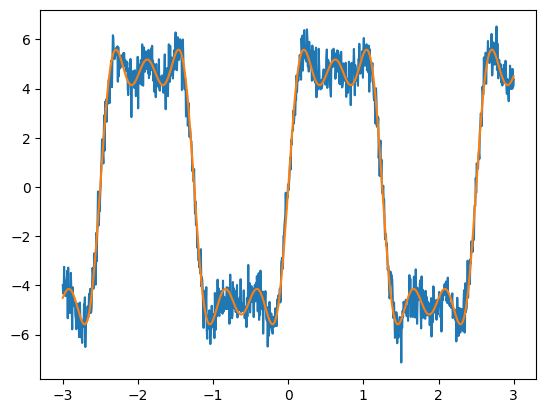

In [13]:
plt.plot(x,y,x, fourier1(x,p1_1, p2_1))

In [14]:
err_y = abs(y - fourier1(x,p1_1,p2_1))

<ErrorbarContainer object of 3 artists>

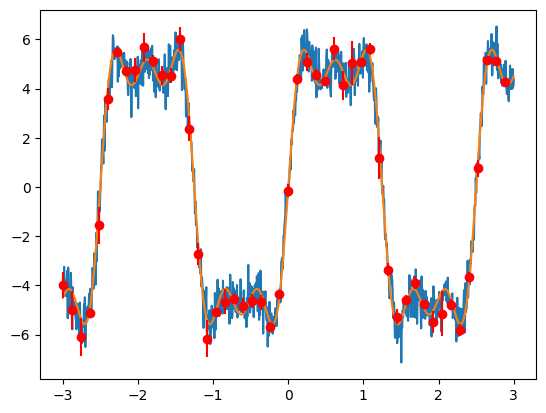

In [15]:
plt.plot(x,y,x, fourier1(x,p1_1,p2_1))

plt.errorbar(x[::20], y[::20],err_y[::20], fmt='ro')

Once again we have found the absolute error in our predicted values and plotted the errorbars as shown above. Since the errorbars are relatively small, we can conclude that our predicted curve is a good fit. 

In [16]:
dset3 = open("datasets/dataset3.txt", "r")

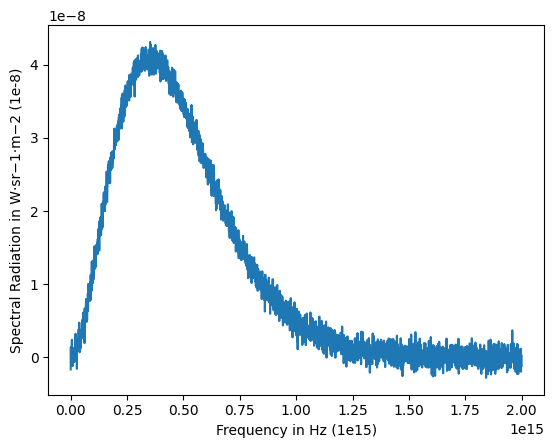

In [17]:
x = []
y = []
for line in dset3:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
x = np.array(x)
y = np.array(y)
plt.xlabel("Frequency in Hz (1e15)")
plt.ylabel("Spectral Radiation in W·sr−1·m−2 (1e-8)")
plt.plot(x,y)

We have plotted the given data, and found it to be non-linear. Therefore we will go ahead with curve_fit to predict the curve.

In [38]:
def blackbody(t, p1, p2):
    return 2*p1*(t**3)/((9e16)*(np.exp(p1*t/((1.38e-23)*p2)) - 1))

from scipy.optimize import curve_fit
(p1, p2), pcov = curve_fit(blackbody, x, y)

/tmp/ipykernel_2417889/659403927.py:2: RuntimeWarning: overflow encountered in exp
  return 2*p1*(t**3)/((9e16)*(np.exp(p1*t/((1.38e-23)*p2)) - 1))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Using the formula for spectral radiance and trying to fit the curve, we initially encounter an overflow error. This is mitigated by setting some initial guesses for our parameters as shown below.

In [18]:
def blackbody(t, p1, p2):
    return 2*p1*(t**3)/((9e16)*(np.exp(p1*t/((1.38e-23)*p2)) - 1))

from scipy.optimize import curve_fit
(p1, p2), pcov = curve_fit(blackbody, x, y, (1e-34, 2000))
print(f"Estimated Values\nh = {p1} J-s\nT = {p2} K")

Estimated Values
h = 6.643229760651299e-34 J-s
T = 6011.36152290849 K


The required parameters have been printed above. The %error in the value of h is less than 0.5%, thus we have obtained a good enough fit.

<ErrorbarContainer object of 3 artists>

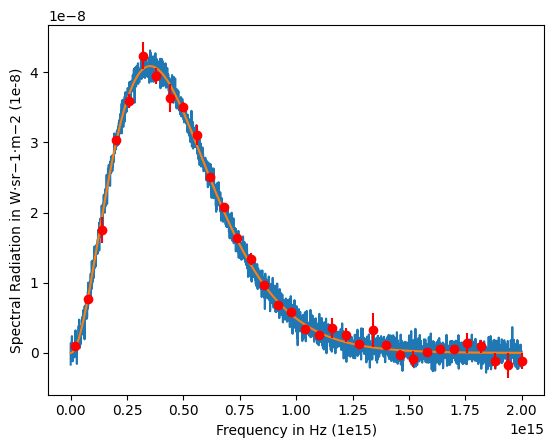

In [19]:
err_y = abs(y - blackbody(x,p1,p2))
plt.plot(x,y,x, blackbody(x, p1, p2))
plt.xlabel("Frequency in Hz (1e15)")
plt.ylabel("Spectral Radiation in W·sr−1·m−2 (1e-8)")

plt.errorbar(x[::90], y[::90],err_y[::90], fmt='ro')

Again, we have plotted the error and the predicted curve. The curve exactly follows the path of the data and the errorbars are small enough to conclude that we have found an adequate fit.

In [42]:
dset4 = open("datasets/dataset4.txt", "r")

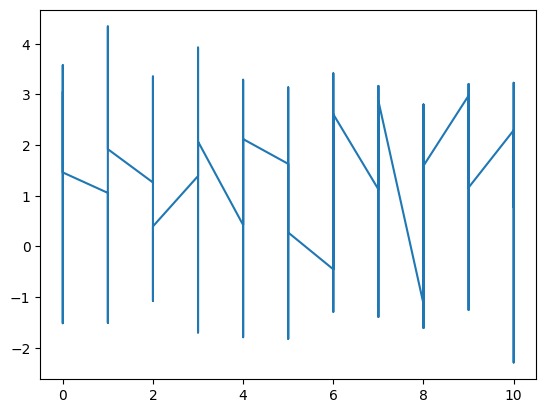

In [43]:
x = []
y = []
for line in dset4:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
x = np.array(x)
y = np.array(y)
plt.plot(x,y)

On plotting the points of the 4th dataset, we get an unusual distribution. This is due to the fact that the dataset has multiple points having the same x-value. Let us see what these x-values are.

In [50]:
set(x)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}

These are the distinct points at which the data is distributed.

In [57]:
x_counts = dict.fromkeys(set(x), 0)
ymid = [0 for i in range (len(set(x)))]
yrms = [0 for i in range (len(set(x)))]
for i in x:
    x_counts[i] += 1
index = 0
for i in x_counts:
    for j in range(x_counts[i]):
        ymid[int(i)] += y[index]/x_counts[i]
        yrms[int(i)] += y[index]**2/x_counts[i]
        index += 1
yrms = np.array([y**0.5 for y in yrms])
ymid = np.array(ymid)
xdist = np.array(list(set(x)))

A starting point would be to take the mean of all the points concentrated at these distinct x-values, and try to fit a curve using them. Since we are taking mean, we may as well try root mean square too.

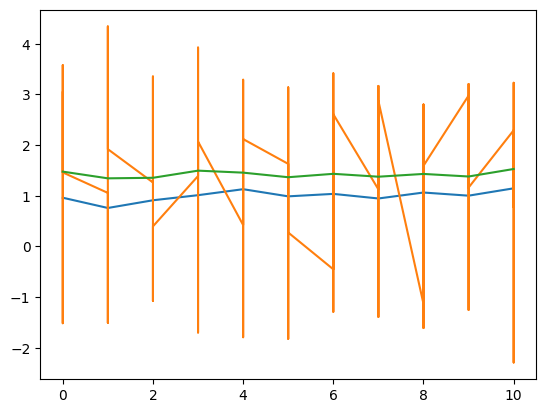

In [58]:
plt.plot(xdist, ymid, x,y, xdist, yrms)

As expected, the RMS values are greater than the mean values. Let us try to fit a polynomial with these mean values.

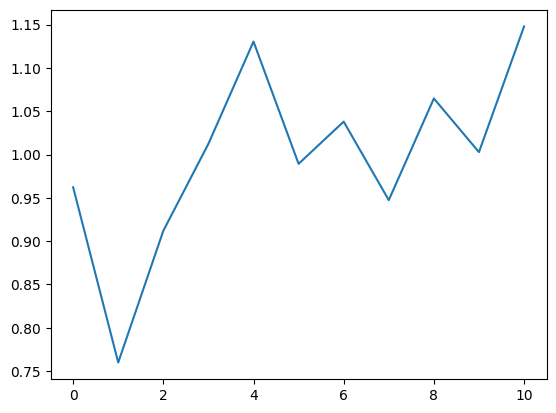

In [68]:
plt.plot(xdist, ymid)

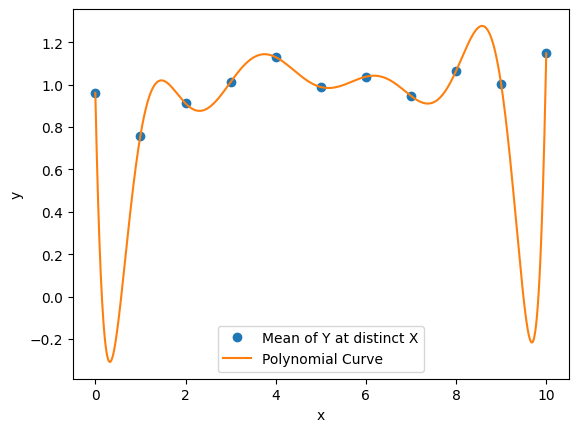

In [64]:
plt.xlabel("x")
plt.ylabel("y")
X1 = np.linspace(0, 10, 1000)
c=np.polyfit(x,y,10)
p = np.poly1d(c)
plt.plot(xdist,ymid,"o",label="Mean of Y at distinct X")
plt.plot(X1,p(X1),label="Polynomial Curve")
plt.legend()
plt.show()

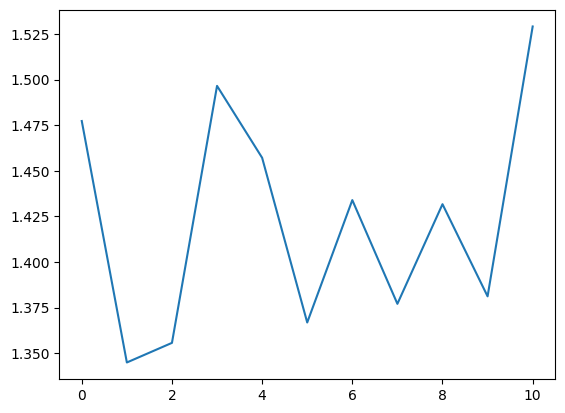

In [67]:
plt.plot(xdist, yrms)

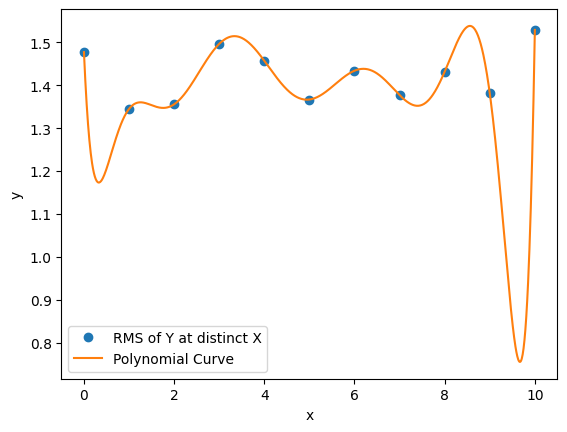

In [66]:
plt.xlabel("x")
plt.ylabel("y")
X1 = np.linspace(0, 10, 1000)
c=np.polyfit(xdist,yrms,10)
p = np.poly1d(c)
plt.plot(xdist,yrms,"o",label="RMS of Y at distinct X")
plt.plot(X1,p(X1),label="Polynomial Curve")
plt.legend()
plt.show()

As can be seen above, we have obtained two polynomials that can be used for future predictions.